# Example Usage of G4EPP

First, import the api and set your desired plotting style...

In [1]:
import context

import matplotlib.pyplot as plt
import numpy as np
from G4EPP import api

from scipy.special import kn

In this example, we'll define an exponential energy distribution:

$$f(E) = \frac{1}{E_0} e^{-E/E_0}$$

and sine squared pitch angle distribution:

$$g(\alpha) = \sin^2(\alpha)$$

to form a weight matrix

$$w(E,\alpha) = f(E)\cdot g(\alpha)$$

that's applied to our Green's function solutions for ionization profiles output by the GEANT4 model to approximate an ionization profile forced by the above initial conditions:

$$I(h) = \int_{E}\int_{\alpha} w(E',\alpha') ~G_{ioni}(E,E',\alpha,\alpha') ~dE ~d\alpha \approx \sum_{i}\sum_j w(E_i,\alpha_j)~G_{ioni}(E,E_i,\alpha,\alpha_j)$$

In [4]:
Api = api();

E  = Api.get_run_list() * 1e3 # keV to eV
PA = Api.get_PA_list()        # deg

# Import energy distributions

In [ ]:
from G4EPP import EnergyDistributions as dists

# Power law distribution with spectral parameter alpha and minimum energy of 10 keV
# PL(E, alpha, Emin)
PLdist = dists().powerLaw()

# Exponential distribution with folding energy E0 
# Expdist(E, E0)
Expdist = dists().exponential()

# Double Maxwellian distribution with energies T1 and T2 
# DoubleMaxdist(E, T1, T2)
DoubleMaxdist = dists().doubleMaxwellian()

# Relativistic Maxwellian distribution with energy parameter T ~ E/511 keV
# RelMaxdist(E, T)
RelMaxdist = dists().relativisticMaxwellian()

# Define pitch angle distributions

In [ ]:
# Sine pitch angle distribution
pitchAngleDistribution = np.sin(np.deg2rad(PA))

# Sine squared pitch angle distribution
#pitchAngleDistribution = np.sin(np.deg2rad(PA))**2

# Sine^n pitch angle distribution
#pitchAngleDistribution = lambad n: np.sin(np.deg2rad(PA))**float(n)

# Isotropic PAD
#pitchAngleDistribution = np.ones(PA.shape)

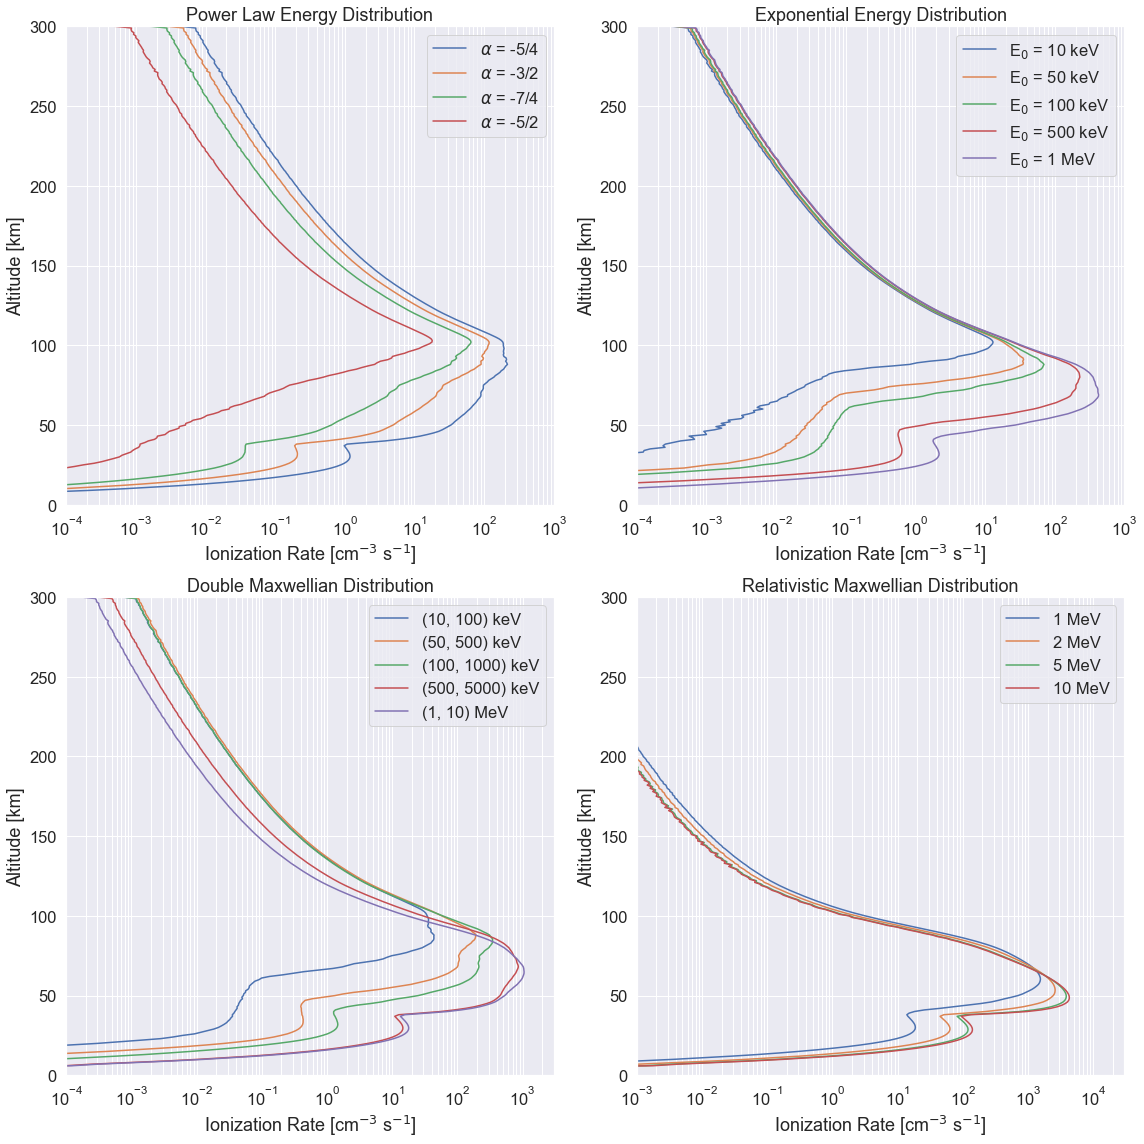

In [3]:

f0 = 1e4 # cm^-2 s^-1 sr^-1 keV^-1

# Plot example ionization profile given energy and pitch angle distribution,
# and differential electron flux of 10^4 cm^-2 s^-1 sr^-1 keV^-1
plt.figure(figsize=(16,16)); plt.subplot(2,2,1)


Emin = 10
Api.plot_ionization_profile(PLdist(E, 1.25, Emin),  pitchAngleDistribution, flux=f0)
Api.plot_ionization_profile(PLdist(E, 1.5, Emin),  pitchAngleDistribution, flux=f0)
Api.plot_ionization_profile(PLdist(E, 1.75, Emin),  pitchAngleDistribution, flux=f0)
Api.plot_ionization_profile(PLdist(E, 2.5, Emin),   pitchAngleDistribution, flux=f0)

plt.legend(["$\\alpha$ = -5/4",
            "$\\alpha$ = -3/2",
            "$\\alpha$ = -7/4", 
            "$\\alpha$ = -5/2"])

plt.xlim(1e-4, 1e3);
plt.title('Power Law Energy Distribution')


plt.subplot(2,2,2)
for ind, E0 in enumerate([10*1e3, 50*1e3, 100*1e3, 500*1e3, 1000*1e3]):
    
    # Plot example ionization profile given energy and pitch angle distribution,
    # and differential electron flux of 10^4 cm^-2 s^-1 sr^-1 keV^-1
    Api.plot_ionization_profile(Expdist(E, E0), pitchAngleDistribution, flux=1e4)

plt.legend(['E$_0$ = 10 keV', 
            'E$_0$ = 50 keV',
            'E$_0$ = 100 keV',
            'E$_0$ = 500 keV',
            'E$_0$ = 1 MeV'])

plt.xlim(1e-4, 1e3);
plt.title('Exponential Energy Distribution');


energyArray = 1e3*np.array([[10, 50, 100, 500, 1000], 
                            [100, 500, 1000, 5000, 10000]])

plt.subplot(2,2,3)
for ind in range(0, energyArray.shape[1]):
    
    # Plot example ionization profile given energy and pitch angle distribution,
    # and differential electron flux of 10^4 cm^-2 s^-1 sr^-1 keV^-1
    Api.plot_ionization_profile(DoubleMaxdist(E, energyArray[0,ind], energyArray[1,ind]), 
                                pitchAngleDistribution, 
                                flux=1e4)

plt.legend(['(10, 100) keV', 
            '(50, 500) keV',
            '(100, 1000) keV',
            '(500, 5000) keV',
            '(1, 10) MeV'])

plt.xlim(1e-4, 3e3);
plt.title('Double Maxwellian Distribution');


plt.subplot(2,2,4)
for ene in 1e3*np.array([1000, 2000, 5000, 10000]):
    
    # Plot example ionization profile given energy and pitch angle distribution,
    # and differential electron flux of 10^4 cm^-2 s^-1 sr^-1 keV^-1
    Api.plot_ionization_profile(RelMaxdist(E, ene), pitchAngleDistribution, flux=1e4)

plt.legend(['1 MeV', '2 MeV', '5 MeV', '10 MeV'])

plt.xlim(1e-3, 3e4);
plt.title('Relativistic Maxwellian Distribution');

plt.tight_layout()